# Housing Price Prediction Using Linear Regression


## Project Overview
This project demonstrates a basic machine learning workflow using  Python and scikit-learn to predict housing prices using numerical features.

## 1. Data Loading and Libraries
We begin by importing the necessary Python libraries and loading the housing dataset.

In [1]:
import sys
sys.executable

'/Users/paher/Documents/personalCodingProjects/ml-housing-price-predictor/venv/bin/python'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("data/housing_model1.csv")
# remove rows with missing data
df = df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Note: Rows with missing values were removed for this baseline model. 
In production systems, missing values would typically be handled via imputation.

## 2. Data Exploration
Explore the structure and basic statistics of the dataset.

## 3. Feature and Target Selection
Separate input features from the target variable.

In [4]:
X = df.drop("median_house_value", axis=1)
X = pd.get_dummies(X, columns = ["ocean_proximity"], drop_first=True)
y = df ["median_house_value"]

## 4. Train-Test Split
Split the data into training and testing sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Model Training
Train a linear regression model on the training data

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 6. Model Evaluation
Evaluate model performance using the R2 metric.

In [7]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.6488402154432009

## 7. Results
The model achieved reasonable predictive performance on unseen data.

Matplotlib is building the font cache; this may take a moment.


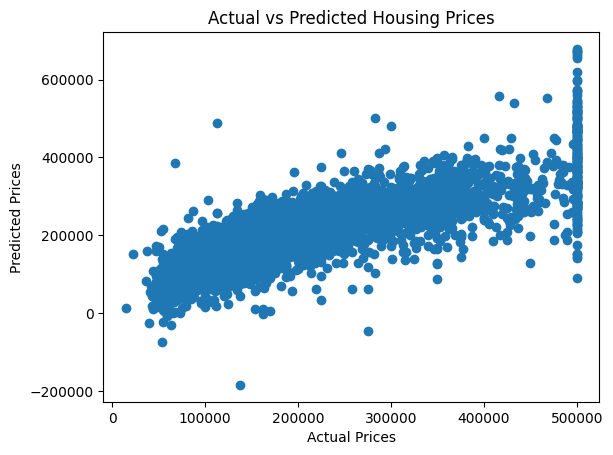

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()